In [3]:
!pip install obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client('IRIS', debug=True)

Installed new opener with handlers: [<obspy.clients.fdsn.client.CustomRedirectHandler object at 0x7b9d12c631c0>]
Base URL: http://service.iris.edu
Request Headers: {'User-Agent': 'ObsPy/1.4.1 (Linux-5.15.154+-x86_64-with-glibc2.31, Python 3.10.13)'}
Loading discovered services from cache.


In [ ]:
net = "IU"
sta = "TUC"
loc = "00"
chan = "HH*"

st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();

In [20]:
minlat = 20.835
maxlat = 51.913

minlon = -135.721
maxlon = -69.810

starttime = UTCDateTime("2022-05-01T00:00:00")
endtime = UTCDateTime("2022-12-10T00:00:00")

minmag = 4
maxmag = 9.0


events = client.get_events(minlatitude=minlat, maxlatitude=maxlat,
                          minlongitude=minlon, maxlongitude=maxlon,
                          minmagnitude=minmag, maxmagnitude=maxmag,
                          starttime=starttime, endtime=endtime)



title = 'M<%d -- %s to %s -- %d total events' % (
    maxmag,
    starttime,
    endtime,
    len(events))

print("found %s event(s):" % len(events))
print(events)

found 93 event(s):
93 Event(s) in Catalog:
2022-12-06T13:29:18.635000Z | +50.698, -130.178 | 4.6  mb
2022-12-06T00:10:37.510000Z | +35.936, -120.013 | 4.1  Mwr
...
2022-05-11T13:32:02.230000Z | +44.681, -109.996 | 4.22 Ml
2022-05-04T18:28:18.117000Z | +40.496, -127.204 | 4.0  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [21]:
import pandas as pd

df = pd.DataFrame(columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magnitude_type', 'creation_info', 'info'])

    # Populate the DataFrame with event data
for i in range(len(events)):
        df.loc[i, 'time'] = events[i].origins[0].time
        df.loc[i, 'latitude'] = events[i].origins[0].latitude
        df.loc[i, 'longitude'] = events[i].origins[0].longitude
        df.loc[i, 'depth'] = events[i].origins[0].depth
        df.loc[i, 'mag'] = events[i].magnitudes[0].mag
        df.loc[i, 'magnitude_type'] = events[i].magnitudes[0].magnitude_type

        # Handle potential missing creation_info or event_descriptions
        creation_info = getattr(events[i].origins[0], 'creation_info', None)
        df.loc[i, 'creation_info'] = creation_info if creation_info else 'N/A'

        event_description = events[i].event_descriptions[0].text if events[i].event_descriptions else 'N/A'
        df.loc[i, 'info'] = event_description

In [22]:
df

,time,latitude,longitude,depth,mag,magnitude_type,creation_info,info
0,2022-12-06T13:29:18.635000Z,50.6979,-130.1776,10000.0,4.6,mb,"[agency_id, agency_uri, author, author_uri, cr...","VANCOUVER ISLAND, CANADA REGION"
1,2022-12-06T00:10:37.510000Z,35.935667,-120.012667,9460.0,4.1,Mwr,"[agency_id, agency_uri, author, author_uri, cr...",CENTRAL CALIFORNIA
2,2022-12-01T15:28:29.660000Z,32.836167,-116.040333,10460.0,4.2,Mw,"[agency_id, agency_uri, author, author_uri, cr...",CALIF.-BAJA CALIF. BORDER REGION
3,2022-11-26T14:40:15.945000Z,30.7737,-116.4114,10000.0,4.3,mb,"[agency_id, agency_uri, author, author_uri, cr...","BAJA CALIFORNIA, MEXICO"
4,2022-11-26T03:50:17.627000Z,49.2766,-126.0994,34283.0,4.9,Mww,"[agency_id, agency_uri, author, author_uri, cr...","VANCOUVER ISLAND, CANADA REGION"
...,...,...,...,...,...,...,...,...
88,2022-05-30T10:46:28.887000Z,22.2434,-70.3805,10000.0,4.0,mb,"[agency_id, agency_uri, author, author_uri, cr...",BAHAMA ISLANDS
89,2022-05-26T09:23:32.530000Z,35.602667,-117.406,4790.0,4.3,Mwr,"[agency_id, agency_uri, author, author_uri, cr...",CENTRAL CALIFORNIA
90,2022-05-13T02:25:37.435000Z,44.4581,-129.7268,10000.0,4.1,mb,"[agency_id, agency_uri, author, author_uri, cr...",OFF COAST OF OREGON
91,2022-05-11T13:32:02.230000Z,44.681,-109.996333,13950.0,4.22,Ml,"[agency_id, agency_uri, author, author_uri, cr...","YELLOWSTONE REGION, WYOMING"


In [23]:
import numpy as np
earthquake_data = np.zeros((len(df),3,12000))
earthquake_data.shape

(93, 3, 12000)

In [24]:
#EARTHQUAKE DATA

In [25]:
import numpy as np
import obspy
from obspy.clients.fdsn import Client

# Initialize FDSN client
client = Client("IRIS")

# Assuming df and earthquake_data are predefined
# Example initialization of earthquake_data
# earthquake_data = np.zeros((len(df), 3, 2000))  # Adjust dimensions as needed

for i in range(len(df)):
    st = obspy.UTCDateTime(df['time'][i].datetime.strftime("%Y-%m-%d %H:%M:%S"))
    try:
        wavedata = client.get_waveforms(network="IU",
                                        station="TUC",
                                        location="00",
                                        channel="BH*",
                                        starttime=st,
                                        endtime=st+300)
    except Exception as e:
        print(f"Error fetching data for event at {st}: {e}")
        continue

    # Check the length of wavedata to ensure it has at least 3 elements
    if len(wavedata) < 3:
        print(f"Warning: Expected 3 traces, but got {len(wavedata)} for event at {st}. Skipping this event.")
        continue

    for j in range(3):
        trace_data = wavedata[j].data
        max_val = abs(trace_data).max()

        if max_val == 0:
            print(f"Warning: Maximum value of trace {j} for event at {st} is zero. Skipping this trace.")
            continue

        if len(trace_data) < 12000:
            p = list(trace_data / max_val)
            diff = 12000 - len(trace_data)
            p.extend([0] * diff)
            earthquake_data[i, j, :] = np.array(p)
        elif len(trace_data) > 12000:
            earthquake_data[i, j, :] = trace_data[:12000] / max_val
        else:
            earthquake_data[i, j, :] = trace_data / max_val

    if (i + 1) % 50 == 0:
        print(f"{i + 1} earthquake samples collected...")

print("Total number of earthquake samples: ", earthquake_data.shape[0])


50 earthquake samples collected...
Total number of earthquake samples:  93


In [9]:
print(earthquake_data[30,:])

[[-0.57301452 -0.56703672 -0.58283518 ... -0.56276687 -0.6648164
  -0.73740393]
 [-0.7482139  -0.74691492 -0.74388396 ... -0.82528686 -0.84801905
  -0.89954536]
 [ 0.215625    0.2109375   0.19609375 ...  0.546875    0.5765625
   0.96015625]]


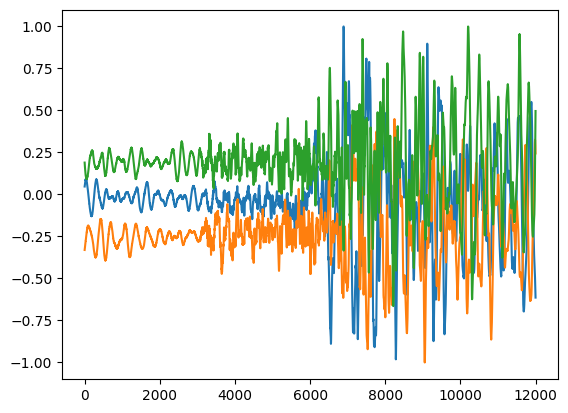

In [29]:
import matplotlib.pyplot as plt
plt.plot(earthquake_data[7, :].T)

In [ ]:
#NON_EARTHQUAKE DATA

In [14]:
import numpy as np
import obspy
from obspy.clients.fdsn import Client

# Initialize FDSN client
client = Client("IRIS")

# Assuming df is a DataFrame with earthquake event details and contains a column named 'time' with UTC times of events
# Example initialization of noise_data
noise_data = np.zeros((500, 3, 12000))  # Adjust dimensions as needed

noise = []
s = 0
while s < 500:
    for j in range(len(df)):
        # Offset the start time by a random amount to ensure non-overlapping with earthquake events
        st = obspy.UTCDateTime(df['time'][j].datetime.strftime("%Y-%m-%d %H:%M:%S")) + 1000 + s * 40

        try:
            wavedata = client.get_waveforms(network="IU",
                                            station="TUC",
                                            location="00",
                                            channel="BH*",
                                            starttime=st,
                                            endtime=st + 300)
        except Exception as e:
            print(f"Error fetching data for time {st}: {e}")
            continue

        if len(wavedata) < 3:
            print(f"Warning: Expected 3 traces, but got {len(wavedata)} for time {st}. Skipping this event.")
            continue

        noise2 = np.zeros((3, 12000))
        for j in range(3):
            trace_data = wavedata[j].data
            max_val = abs(trace_data).max()

            if max_val == 0:
                print(f"Warning: Maximum value of trace {j} for time {st} is zero. Skipping this trace.")
                continue

            if len(trace_data) < 12000:
                p = list(trace_data / max_val)
                diff = 12000 - len(trace_data)
                p.extend([0] * diff)
                noise2[j] = np.array(p)
            elif len(trace_data) > 12000:
                noise2[j] = trace_data[:12000] / max_val
            else:
                noise2[j] = trace_data / max_val

        noise.append(noise2)
        s += 1

        if s % 100 == 0:
            print(f"{s} non-earthquake samples collected...")

        if s >= 500:
            break

noise_data = np.array(noise)
print("Total number of non-earthquake samples: ", noise_data.shape[0])

100 non-earthquake samples collected...
200 non-earthquake samples collected...
300 non-earthquake samples collected...
400 non-earthquake samples collected...
500 non-earthquake samples collected...
Total number of non-earthquake samples:  500


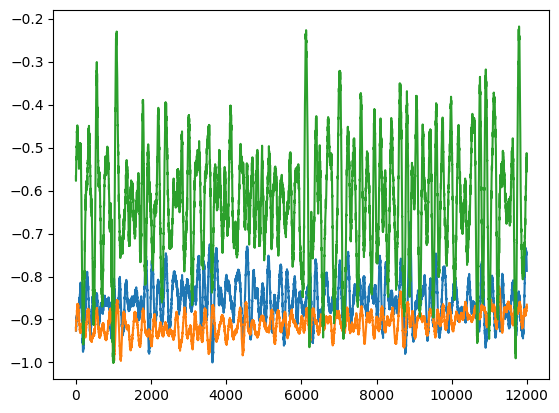

In [26]:
import matplotlib.pyplot as plt
plt.plot(noise_data[200, :].T)

In [27]:

np.save("noise_waveforms_500_samples.npy", noise_data)

In [30]:
y_earthquake_data = np.ones((len(df),1))
y_noise_data = np.zeros((len(noise_data),1))
W = np.concatenate([earthquake_data,noise_data], axis=0)
Y = np.concatenate([y_earthquake_data, y_noise_data], axis=0)
W.shape,Y.shape

((593, 3, 12000), (593, 1))

In [31]:
np.max(earthquake_data), np.min(earthquake_data)

(1.0, -1.0)

In [32]:
np.max(noise_data), np.min(noise_data)

(1.0, -1.0)

In [33]:
seed = 42
np.random.seed(seed)
np.random.shuffle(W)
np.random.seed(seed)
np.random.shuffle(Y)

In [34]:
Y

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

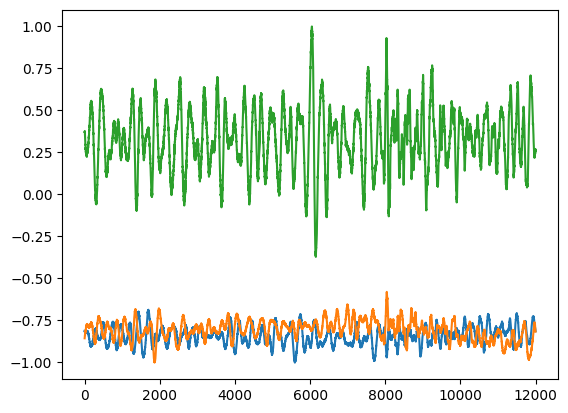

In [35]:
plt.plot(W[0].T)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


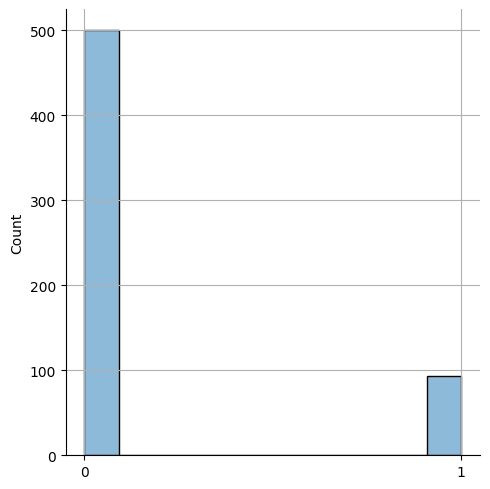

In [36]:
import seaborn as sns
sns.displot(Y,legend=False, kind='hist')
plt.xticks([0,1])
plt.grid()

In [ ]:
'''
import obspy
from obspy.clients.fdsn import Client

from obspy import UTCDateTime



client = Client("IRIS")

# Livermore
lon = -134.7677
lat = 58.6611

st = UTCDateTime("2016-12-30T18:27:12")

# Get currently active stations in 5 km radius around Livermore.
catalog = client.get_events(longitude=lon, latitude=lat, starttime=st - 100, endtime=st + 3600,
                        )
print(catalog)
'''

In [ ]:
'''
import pandas as pd

df2 = pd.DataFrame(columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magnitude_type', 'creation_info', 'info'])

    # Populate the DataFrame with event data
for i in range(len(catalog)):
        df2.loc[i, 'time'] = catalog[i].origins[0].time
        df2.loc[i, 'latitude'] = catalog[i].origins[0].latitude
        df2.loc[i, 'longitude'] = catalog[i].origins[0].longitude
        df2.loc[i, 'depth'] = catalog[i].origins[0].depth
        df2.loc[i, 'mag'] = catalog[i].magnitudes[0].mag
        df2.loc[i, 'magnitude_type'] = catalog[i].magnitudes[0].magnitude_type

        # Handle potential missing creation_info or event_descriptions
        creation_info = getattr(catalog[i].origins[0], 'creation_info', None)
        df2.loc[i, 'creation_info'] = creation_info if creation_info else 'N/A'

        event_description = catalog[i].event_descriptions[0].text if catalog[i].event_descriptions else 'N/A'
        df2.loc[i, 'info'] = event_description
'''        

In [ ]:
'''df2'''

In [ ]:
'''
inventory = client.get_stations(network="CC", station="FLAT",
                                level="channel")
print(inventory)

In [ ]:
'''
!pip install cartopy
import cartopy as crt
import cartopy.feature as cfeature
event = catalog[0]
origin = event.origins[0]
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader

# Livermore
lon = -134.7677
lat = 58.6611

st = UTCDateTime("2016-12-30T18:27:12")

#domain = CircularDomain(latitude=lat, longitude=lon,
#minradius=0, maxradius=90.0)

# Get currently active stations in 5 km radius around Livermore.
inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=0.9, level="channel",
                                starttime=st)
print(inventory)

# No specified providers will result in all known ones being queried.
#mdl = MassDownloader()
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
#mdl.download(domain, restrictions, mseed_storage="waveforms",
             #stationxml_storage="stations")

In [38]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader

origin_time = obspy.UTCDateTime("2020-10-05T05:02:51")

# Circular domain around the epicenter. This will download all data between
# 70 and 90 degrees distance from the epicenter. This module also offers
# rectangular and global domains. More complex domains can be defined by
# inheriting from the Domain class.
lon = -148.1660
lat = 61.1542
domain = CircularDomain(latitude=lat, longitude=lon,
                        minradius=0, maxradius=10)

restrictions = Restrictions(
    # Get data from 5 minutes before the event to one hour after the
    # event. This defines the temporal bounds of the waveform data.
    starttime=origin_time - 600,
    endtime=origin_time + 1200,
    # You might not want to deal with gaps in the data. If this setting is
    # True, any trace with a gap/overlap will be discarded.
    reject_channels_with_gaps=True,
    # And you might only want waveforms that have data for at least 95 % of
    # the requested time span. Any trace that is shorter than 95 % of the
    # desired total duration will be discarded.
    minimum_length=0.95,
    # No two stations should be closer than 10 km to each other. This is
    # useful to for example filter out stations that are part of different
    # networks but at the same physical station. Settings this option to
    # zero or None will disable that filtering.
    minimum_interstation_distance_in_m=10E3,
    # Only HH or BH channels. If a station has HH channels, those will be
    # downloaded, otherwise the BH. Nothing will be downloaded if it has
    # neither. You can add more/less patterns if you like.
    channel_priorities=["HH[ZNE]", "BH[ZNE]"],
    # Location codes are arbitrary and there is no rule as to which
    # location is best. Same logic as for the previous setting.
    location_priorities=["", "00", "10"])

# No specified providers will result in all known ones being queried.
mdl = MassDownloader()
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
mdl.download(domain, restrictions, mseed_storage="waveforms",
             stationxml_storage="stations")

[2024-07-19 05:43:01,029] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for AUSPASS, BGR, EIDA, EMSC, ETH, GEOFON, GEONET, GFZ, ICGC, IESDMC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, RESIFPH5, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2024-07-19 05:43:01,029] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for AUSPASS, BGR, EIDA, EMSC, ETH, GEOFON, GEONET, GFZ, ICGC, IESDMC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, RESIFPH5, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2024-07-19 05:43:01,058] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2024-07-19 05:43:01,058] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2024-07-19 05:43:01,060] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does n

{'AUSPASS': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9cdcead2a0>,
 'BGR': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9cdcead420>,
 'EIDA': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9cdceaf640>,
 'ETH': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9d12c62e90>,
 'GEOFON': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9cdca79600>,
 'GEONET': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9ceac712a0>,
 'GFZ': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9ceac73010>,
 'ICGC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9ceac71270>,
 'INGV': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7b9ceac72320>,
 'IPGP': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientD

In [ ]:
import os

# Define the new folder path
new_folder_path = '/kaggle/working/data_2'

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)
print(f"New folder created at: {new_folder_path}")

import shutil

# Define the source and destination folder paths
source_folder = '/kaggle/working/waveforms'
destination_folder = '/kaggle/working/data_2'

# Copy all files from the source to the destination folder
for filename in os.listdir(source_folder):
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copy(source_file, destination_file)

print(f"All files copied from {source_folder} to {destination_folder}")


In [ ]:
from obspy import read
from obspy import Stream

# Read all miniSEED files in the directory into a Stream object
#st = read("/kaggle/working/waveforms/*", format="MSEED")

# Create an empty Stream object to hold all traces
#st1 = Stream()

# Append each Trace object from the original Stream to the new Stream
for tr in st:
    st1.append(tr)

# Print the combined Stream object
print(st1)


In [ ]:
'''import pandas as pd
station_data = []

for network in st1:
    for station in network:
        for channel in station:
            station_data.append([network.code, station.code, channel.code])

# Convert the list to a DataFrame
df2 = pd.DataFrame(station_data, columns=["Network", "Station", "Channel"])
'''

In [39]:
import numpy as np
from obspy import read
from obspy import Stream
import pandas as pd

# Read all miniSEED files in the directory into a Stream object
st = read("/kaggle/working/waveforms/*", format="MSEED")

# Create an empty Stream object to hold all traces
st1 = Stream()

# Append each Trace object from the original Stream to the new Stream
for tr in st:
    st1.append(tr)

# Merge overlapping or contiguous traces
st1.merge()

# Write the combined Stream object to a miniSEED file
st1.write("rockslide.mseed", format="MSEED")

# Create a DataFrame for network, station, and channel information
station_data = []

for tr in st1:
    station_data.append([tr.stats.network, tr.stats.station, tr.stats.channel])

# Convert the list to a DataFrame
df2 = pd.DataFrame(station_data, columns=["Network", "Station", "Channel"])

# Find the maximum trace length
max_length = max(len(tr.data) for tr in st1)

# Pad traces to the maximum length and store in a NumPy array
trace_data_array = np.zeros((len(st1), max_length))

for i, tr in enumerate(st1):
    trace_length = len(tr.data)
    trace_data_array[i, :trace_length] = tr.data

# Print the DataFrame and the shape of the trace data array
print(df2)
print(trace_data_array.shape)



/opt/conda/lib/python3.10/site-packages/obspy/io/mseed/core.py:824: UserWarning: File will be written with more than one different encodings.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'encodings')
/opt/conda/lib/python3.10/site-packages/obspy/io/mseed/core.py:826: UserWarning: File will be written with more than one different record lengths.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'record lengths')


    Network Station Channel
0        AK     ANM     BHE
1        AK     ANM     BHN
2        AK     ANM     BHZ
3        AK    B18K     BHE
4        AK    B18K     BHN
..      ...     ...     ...
962      Z5    ICE5     BHN
963      Z5    ICE5     BHZ
964      Z5    ICE7     BHE
965      Z5    ICE7     BHN
966      Z5    ICE7     BHZ

[967 rows x 3 columns]
(967, 180001)


In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming earthquake_non_earthquake_data is your combined earthquake and non-earthquake data
# and rockfall_data is your rockfall data

# 1. Reshape and trim/pad rockfall data
def reshape_and_trim(data, target_length=12000, n_channels=3):
    # Assuming data shape is (samples, time_steps)
    samples, time_steps = data.shape
    
    # If time_steps is not divisible by n_channels, we'll trim it
    time_steps_trimmed = (time_steps // n_channels) * n_channels
    data_trimmed = data[:, :time_steps_trimmed]
    
    # Reshape to (samples, channels, time_steps)
    reshaped_data = data_trimmed.reshape(samples, n_channels, -1)
    
    # Now trim or pad to target_length
    if reshaped_data.shape[2] > target_length:
        return reshaped_data[:, :, :target_length]
    elif reshaped_data.shape[2] < target_length:
        pad_width = ((0, 0), (0, 0), (0, target_length - reshaped_data.shape[2]))
        return np.pad(reshaped_data, pad_width, mode='constant')
    else:
        return reshaped_data

rockfall_data_reshaped = reshape_and_trim(trace_data_array)

# 2. Combine the datasets
combined_data = np.concatenate([W, rockfall_data_reshaped], axis=0)

# 3. Create labels

rockfall_labels = np.full(967, 2)  # Rockfall
rockfall_labels_2d = rockfall_labels.reshape(-1, 1)
combined_labels = np.concatenate([Y, rockfall_labels_2d])



# 4. Shuffle the data
shuffle_idx = np.random.permutation(len(combined_data))
combined_data_shuffled = combined_data[shuffle_idx]
combined_labels_shuffled = combined_labels[shuffle_idx]

# 5. Normalize the data
scaler = StandardScaler()
combined_data_normalized = scaler.fit_transform(combined_data_shuffled.reshape(-1, 12000 * 3)).reshape(-1, 3, 12000)

# Now combined_data_normalized and combined_labels_shuffled are ready for training

# 6. Split into train, validation, and test sets
#from sklearn.model_selection import train_test_split

#X_train, X_temp, y_train, y_temp = train_test_split(combined_data_normalized, combined_labels_shuffled, test_size=0.3, random_state=42, stratify=combined_labels_shuffled)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#print("Training set shape:", X_train.shape)
#print("Validation set shape:", X_val.shape)
#print("Test set shape:", X_test.shape)

In [42]:
import numpy as np
np.save("Test_Dataset_waveforms_train.npy", combined_data)
np.save("Test_Dataset_labels_train.npy", combined_labels)

import os
os.getcwd()

'/kaggle/working'

In [44]:
import numpy as np
np.save("Rockfall_test_Dataset_waveforms_train.npy", rockfall_data_reshaped)
np.save("Rockfall_test_Dataset_labels_train.npy",rockfall_labels_2d)

import os
os.getcwd()

'/kaggle/working'

In [ ]:
import seaborn as sns
sns.displot(combined_labels,legend=False, kind='hist')
plt.xticks([0,1,2])
plt.grid()

In [ ]:
st = read("/kaggle/working/rockslide", format="mseed")
print(st)
st.plot()

In [ ]:
'''
t = obspy.UTCDateTime("2016-12-30T18:27:12")
st = client.get_waveforms("AK", "BESE", " ", "BH?",
                          t - 10 * 60, t + 20 * 60)
inv = client.get_stations(network="AK", station="BESE", location=" ", channel="BH?",
                          level="response", starttime=t - 10, endtime=t + 10)
st.plot()

st.remove_response(inventory=inv)
st.plot()
'''

In [ ]:
'''
import pandas as pd
station_data = []

for network in inventory:
    for station in network:
        for channel in station:
            station_data.append([network.code, station.code, channel.code])

# Convert the list to a DataFrame
df2 = pd.DataFrame(station_data, columns=["Network", "Station", "Channel"])
'''

In [ ]:
"df2"

In [ ]:
'''starttime = UTCDateTime("2022-09-03T20:52:15")-20
et = starttime + 100

for index, row in df2.iterrows():
    network = row["Network"]
    station = row["Station"]
    channel = row["Channel"]

    try:
        # Download waveform data
        st = client.get_waveforms(network=network, station=station, location="--", channel=channel, starttime=starttime, endtime=et)

        # Add the retrieved waveform to the stream
        waveforms += st
    except Exception as e:
        print(f"Failed to download data for {network}.{station}.{channel}: {e}")

# Save the combined waveform data in MiniSEED format
waveforms.write("event_waveforms.mseed", format="MSEED")
'''
